In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import imdb

In [2]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [3]:
rnn=models.Sequential()
rnn.add(layers.Embedding(max_words,16))
rnn.add(layers.SimpleRNN(16,return_sequences='True'))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.SimpleRNN(16))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.Dense(1,activation='sigmoid'))
rnn.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['acc'])

In [4]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 16)          528       
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 161,073
Trainable params: 161,073
Non-trainable params: 0
__________________________________________________

In [5]:
history=rnn.fit(X_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 4s 27ms/step - loss: 0.5644 - acc: 0.6852 - val_loss: 0.4422 - val_acc: 0.8024
Epoch 2/10
157/157 [==============================] - 4s 25ms/step - loss: 0.3486 - acc: 0.8580 - val_loss: 0.3850 - val_acc: 0.8334
Epoch 3/10
157/157 [==============================] - 4s 26ms/step - loss: 0.2663 - acc: 0.8974 - val_loss: 0.3915 - val_acc: 0.8240
Epoch 4/10
157/157 [==============================] - 4s 25ms/step - loss: 0.2107 - acc: 0.9233 - val_loss: 0.4189 - val_acc: 0.8286
Epoch 5/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1651 - acc: 0.9426 - val_loss: 0.4207 - val_acc: 0.8290
Epoch 6/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1312 - acc: 0.9566 - val_loss: 0.4652 - val_acc: 0.8308
Epoch 7/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1002 - acc: 0.9688 - val_loss: 0.5283 - val_acc: 0.8308
Epoch 8/10
157/157 [==============================] - 4s 26ms/step - 

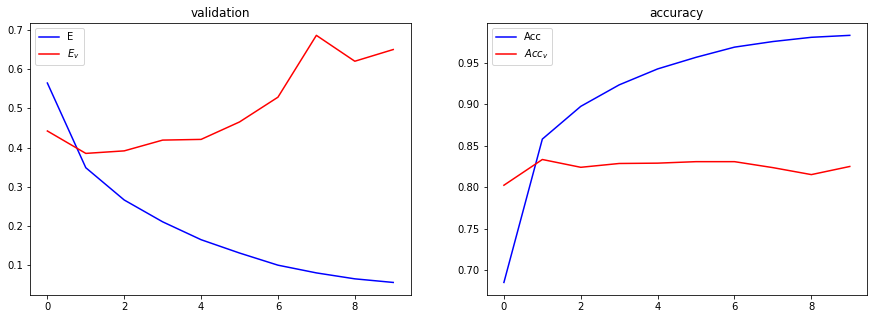

In [7]:
data_dict = history.history
loss = history.history['loss']
data_loss = data_dict['val_loss']
acc = data_dict['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(loss,'b-',label='E')
plt.plot(data_loss,'r-',label='$E_v$')
plt.title('validation')
plt.legend()

plt.subplot(122)
plt.plot(acc,'b-',label='Acc')
plt.plot(val_acc,'r-',label='$Acc_v$')
plt.title('accuracy')
plt.legend()

In [8]:
test_loss, test_acc = rnn.evaluate(X_test,y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.6939 - acc: 0.8213


IMDB셋트를 RNN 학습한 결과 정확도는 82.1%가 나왔다. validation과 accuracy 그래프를 보면 만족스럽지 못한 결과이다. IMDB가 사람의 감정에 따른 영화 리뷰 데이터 셋이기 때문에 개인에 따른 언어의 온도차를 완벽히 분석하지 못했거나 리뷰라는 캐주얼하고 긴 줄글 특성 상 time step이 길어질수록 앞의 정보가 뒤의 정보와 관련성이 다소 떨어질 수 있기 때문에 발생한 분석 결과라 생각된다.